# **Analysis of the Top 25 biggest retailers in the US.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns

In [2]:
df = pd.read_csv('largest_us_retailers.csv')
df.head().round(2)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.65,0.01,Supercenters
1,Kroger,115037,3931.0,30.03,0.05,Grocery
2,Costco,90048,495.0,187.80,0.07,Warehouse Club
3,Home Depot,83976,1965.0,42.74,0.00,Home Improvement
4,Walgreen Boots,78924,8002.0,9.81,-0.01,Drug Stores


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             25 non-null     object 
 1   Sales               25 non-null     int64  
 2   Stores              23 non-null     float64
 3   Sales/Avg. Store    23 non-null     float64
 4   Store Count Growth  23 non-null     float64
 5   Category            24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ KB


In [4]:
df.describe().round(2)

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,25.00,23.00,23.00,23.00
mean,71063.08,3466.57,36.87,0.04
std,125405.73,4038.71,40.63,0.07
min,16592.00,231.00,1.56,-0.06
25%,24402.00,1029.00,11.26,-0.00
50%,34980.00,1828.00,26.00,0.02
75%,71687.00,4242.00,41.36,0.08
max,658119.00,14250.00,187.80,0.26


## **I. Business questions**

### **1. What is the sales average without considering the leading company?**

In [5]:
# Function to format thousands dot separator in plots.

def func(x, pos):
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + '.'.join(reversed(groups))

x_format = tkr.FuncFormatter(func)

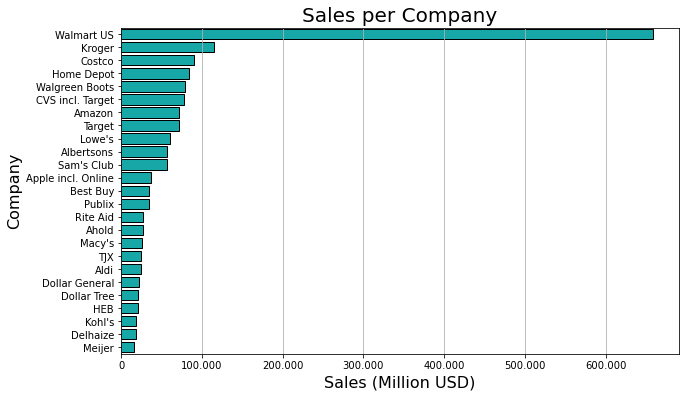

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['Sales'], y=df['Company'], edgecolor='black', color='c')
ax.xaxis.set_major_formatter(x_format)
plt.title('Sales per Company', fontsize=20)
plt.xlabel('Sales (Million USD)', fontsize=16)
plt.ylabel('Company', fontsize=16)
plt.grid(axis='x')
plt.show()

**Answer:** As observed, **Walmart US** could be considered as a special case in this dataframe since this is the company that more sales generated, with a total estimate of **$660.000 million USD**, about six times (6x) the second top seller **Kroger**.

Therefore, the sales average value by the rest of the companies is estimated as follows:

In [7]:
round(df['Sales'][1:].mean(), 2)

46602.42

By applying the 'slicing' technique to the 'Sales' column, the sales generated by Walmart US can be excluded. Hence, by using the **.mean()** method, the average obtained is **$46.602,42 million dollars**.

### **2. How much money in sales did most of the companies generated?**

In [8]:
# New dataframe excluding Walmart US

df_most = df[1:]
df_most_sales = df_most.sort_values('Sales', ascending=False)
df_most_sales.describe().round(2)

,Sales,Stores,Sales/Avg. Store,Store Count Growth
count,24.00,22.00,22.00,22.00
mean,46602.42,3416.23,35.56,0.04
std,28317.98,4126.36,41.08,0.07
min,16592.00,231.00,1.56,-0.06
25%,23860.00,959.00,10.54,-0.00
50%,34694.00,1800.00,25.34,0.03
75%,71327.75,3640.75,38.60,0.08
max,115037.00,14250.00,187.80,0.26


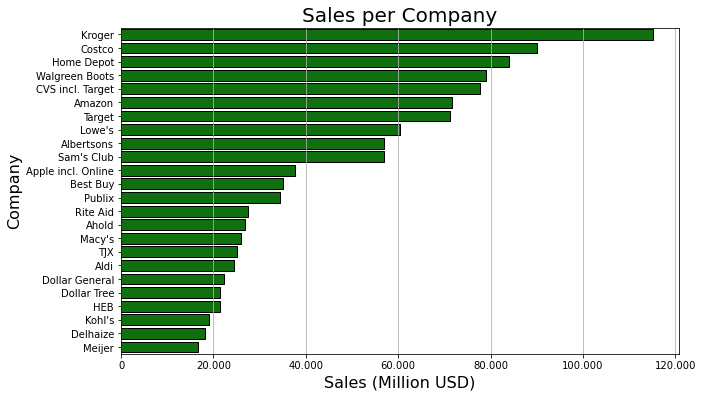

In [9]:
# Sales per company without Walmart US

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_most_sales['Sales'], y=df_most_sales['Company'], edgecolor='black', color='g')
ax.xaxis.set_major_formatter(x_format)
plt.title('Sales per Company', fontsize=20)
plt.xlabel('Sales (Million USD)', fontsize=16)
plt.ylabel('Company', fontsize=16)
plt.grid(axis='x')
plt.show()

In [10]:
# Quartiles

min_val = df_most_sales['Sales'].quantile(q=0)
Q1 = df_most_sales['Sales'].quantile(q=0.25)
median = df_most_sales['Sales'].median()
Q3 = df_most_sales['Sales'].quantile(q=0.75)
max_val = df_most_sales['Sales'].quantile(q=1)
iqr = Q3 - Q1

print('Minimum Sales = {} millions USD'.format(min_val))
print('Minimum Sales = {} millions USD'.format(max_val))
print('Interquartile Range (IQR) = {} millions USD'.format(iqr))

Minimum Sales = 16592.0 millions USD
Minimum Sales = 115037.0 millions USD
Interquartile Range (IQR) = 47467.75 millions USD


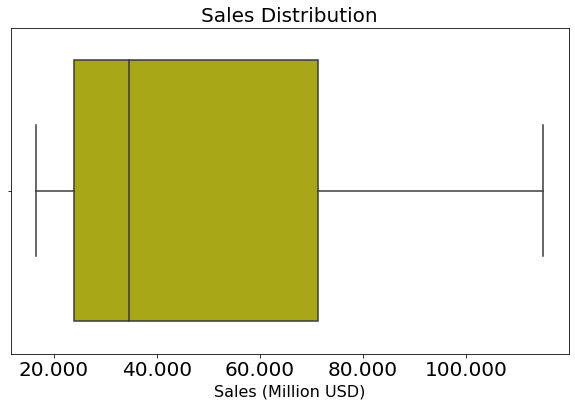

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_most_sales, x=df_most_sales['Sales'], color='y')
ax.xaxis.set_major_formatter(x_format)
plt.title('Sales Distribution', fontsize=20)
plt.xlabel('Sales (Million USD)', fontsize=16)
plt.show()

**Answer:** According to the information provided by the dataframe, it is possible to observe that the least sales amount was generated by **Meijer** by approximately **16.595 million USD**. The biggest amount on the other hand, was generated by **Kroger** with a total of **115.037 million USD**. However, it is also correct to state that a sales average of about **47.000 million USD** was generated among the companies, without considering the **Walmart US** sales.

### **3. How many stores does most of the companies have?**

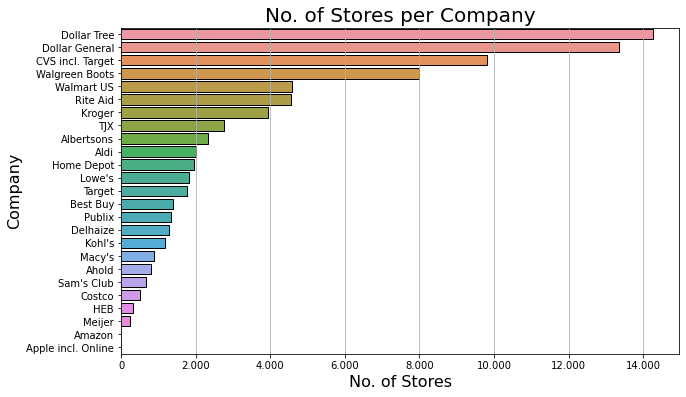

In [12]:
df_most_stores = df.sort_values('Stores', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_most_stores['Stores'], y=df_most_stores['Company'], edgecolor='black')
ax.xaxis.set_major_formatter(x_format)
plt.title('No. of Stores per Company', fontsize=20)
plt.xlabel('No. of Stores', fontsize=16)
plt.ylabel('Company', fontsize=16)
plt.grid(axis='x')
plt.show()

The previous diagram allows to see the amount of stores per company. However, it does not allow to easily distinguish how many stores does most of the companies have. The following boxplot allows a better visualization of this:

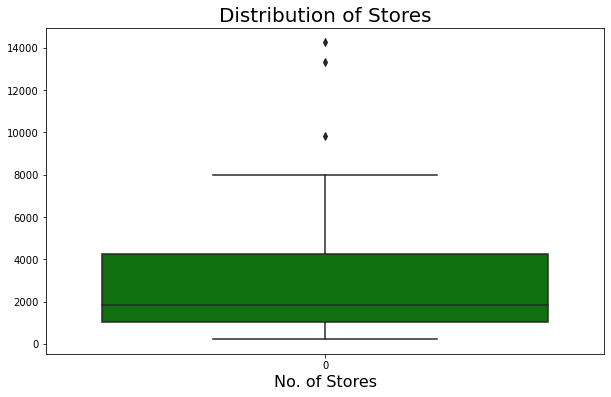

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(df['Stores'], color='g')
ax.xaxis.set_major_formatter(x_format)
plt.title('Distribution of Stores', fontsize=20)
plt.xlabel('No. of Stores', fontsize=16)
plt.show()

**Answer:** Therefore, from the previous boxplot it is possible to say that most of the companies have approximately 2.000 stores throughout the US. A few companies have store above the 8.000 (outliers).

### **4. Is the amount of stores related to the amount of sales? For instance, if a company has more stores, would it generate more money from sales?**

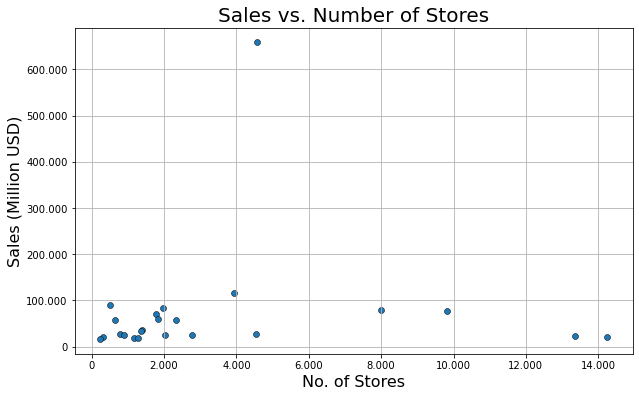

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Stores', y='Sales', edgecolor='black')
ax.xaxis.set_major_formatter(x_format)
ax.yaxis.set_major_formatter(x_format)
plt.title('Sales vs. Number of Stores', fontsize=20)
plt.xlabel('No. of Stores', fontsize=16)
plt.ylabel('Sales (Million USD)', fontsize=16)
plt.grid(axis='both')
plt.show()

**Answer:** A higher sales volume is not necessarily related to a higher number of stores. Looking closely at the scatterplot, it is possible to deduce that regardless of the number of operative stores, sales records are mostly below $100 billion USD (with a few exceptions). That is, even those companies that have a high number of stores, obtained comparatively similar total sales to those companies with a lower number of stores in the entire US territory.

### **5. What is the difference between the maximum and minimum sales?**

In [15]:
print('Max. Sales = {}'.format(df['Sales'].max()))
print('Min. Sales = {}'.format(df['Sales'].min()))
range = df['Sales'].max() - df['Sales'].min()
print('Range = {}'.format(range))

Max. Sales = 658119
Min. Sales = 16592
Range = 641527


### **6. What is the Top 5 companies with more stores? Which of them are among the Top 5 with more sales?**

In [16]:
df_stores = df.sort_values('Stores', ascending=False)
df_stores.head().round(2)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.56,0.08,Dollar Stores
19,Dollar General,22234,13350.0,1.77,0.13,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.83,0.26,Drug Stores
4,Walgreen Boots,78924,8002.0,9.81,-0.01,Drug Stores
0,Walmart US,658119,4574.0,65.65,0.01,Supercenters


The table shows the top 5 companies with the biggest number of stores.

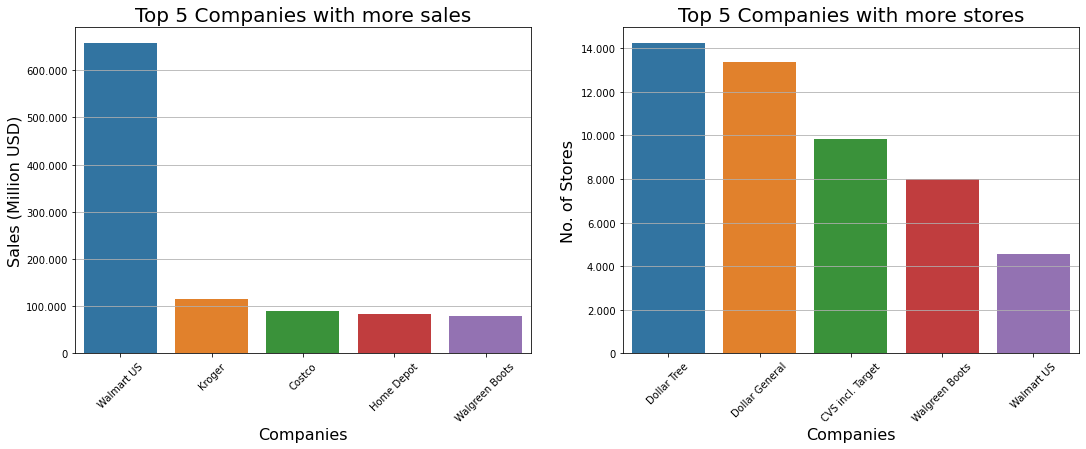

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (18,6))

sns.barplot(data=df.head(), x='Company', y='Sales', ax=ax[0])
ax[0].set_title('Top 5 Companies with more sales', fontsize=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].yaxis.set_major_formatter(x_format)
ax[0].grid(axis='y')
ax[0].set_xlabel('Companies', fontsize=16)
ax[0].set_ylabel('Sales (Million USD)', fontsize=16)

sns.barplot(data=df_stores.head(), x='Company', y='Stores', ax=ax[1])
ax[1].set_title('Top 5 Companies with more stores', fontsize=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].yaxis.set_major_formatter(x_format)
ax[1].grid(axis='y')
ax[1].set_xlabel('Companies', fontsize=16)
ax[1].set_ylabel('No. of Stores', fontsize=16)

plt.show()

**Answer:** The left plot represents the top 5 companies with the largest sales volume, while the right plot shows the top 5 companies with the biggest number of stores across the US. Therefore, **Walmart US** and **Walgreen Boots** are the companies among the top 5 with more stores that generated more sales.

### **7. Which company category generated more sales?**

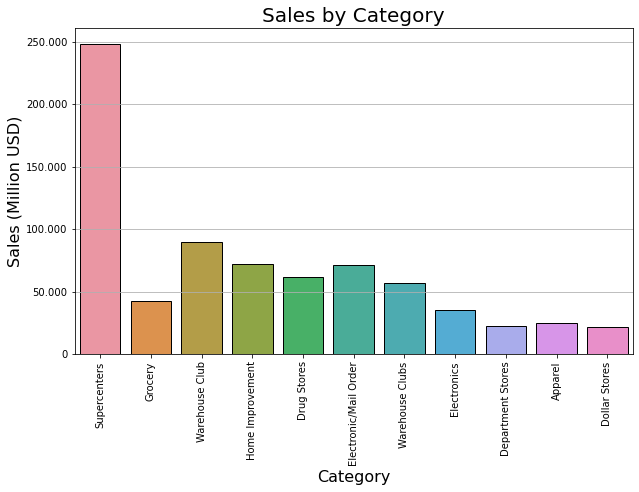

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['Category'], y=df['Sales'], edgecolor='black', errorbar=None)
ax.yaxis.set_major_formatter(x_format)
plt.title('Sales by Category', fontsize=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Sales (Million USD)', fontsize=16)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

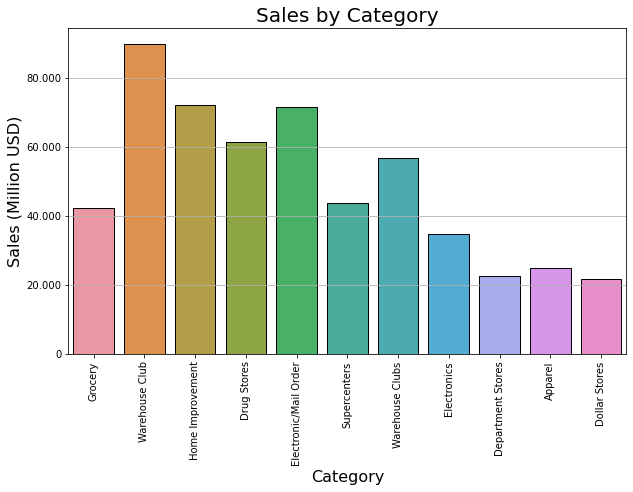

In [19]:
# Excluding Walmart US

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df['Category'][1:], y=df['Sales'][1:], edgecolor='black', errorbar=None)
ax.yaxis.set_major_formatter(x_format)
plt.title('Sales by Category', fontsize=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Sales (Million USD)', fontsize=16)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

**Answer:** If the Walmart US case is taken into account, the category that generated the biggest sales volume is the **Supercenters** one. But, if Walmart US is not considered, actually the category with the biggest sales is **Warehouse Club**.

### **8. Which one is the company that generated more sales in relation to its amount of stores?**

In [20]:
df_sales_store = df.sort_values('Sales/Avg. Store', ascending=False)
df_sales_store.head().round(2)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
2,Costco,90048,495.0,187.80,0.07,Warehouse Club
10,Sam's Club,56828,655.0,87.29,0.01,Warehouse Clubs
24,Meijer,16592,231.0,74.74,0.08,Supercenters
21,HEB,21384,323.0,66.82,0.02,Grocery
0,Walmart US,658119,4574.0,65.65,0.01,Supercenters


**Answer:** According to the previous table, it is possible to observe that the company with the largest sales volume per average store belongs to **Costco**, with a total sales of **187.80 million USD** per average store.

### **9. Which ones are the companies that sell exclusively online? Are their sales superior to those companies that sell on-premise?**

In [21]:
df_online = df[df['Stores'].isna()]
df_online

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


By applying the **.isna()** method it is possible to filter those companies that do not have on-premise stores. Therefore, the companies that execute their comercial activities exclusively online are **Amazon** and **Apple Inc. Online**. Now, with the purpose to understand their relative impact on sale, the following diagram is shown:

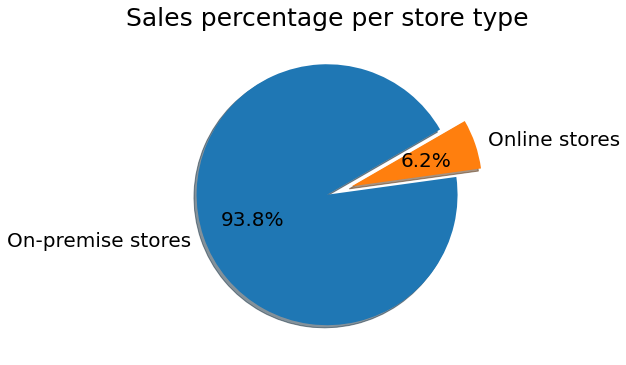

In [26]:
df_fisica = df.dropna()
sum_sales_fisica = df_fisica['Sales'].sum()
sum_sales_online = df_online['Sales'].sum()

store_sales = [sum_sales_fisica, sum_sales_online]
store_type = ['On-premise stores', 'Online stores']
exp = [0, 0.2]

plt.figure(figsize=(10, 6))
plt.pie(store_sales, labels=store_type, explode=exp, shadow=True, autopct='%.1f%%', startangle=30)
plt.title('Sales percentage per store type', fontsize=25)
plt.rcParams['font.size'] = 20
plt.show()

**Answer:** According to this, **93.8%** corresponds to sales generated by companies with **on-premise stores**. Only the **6.2%** left of the sales were generated by online stores. Therefore, it is valid to conclude that online store sales do not represent a significative impact regarding the sales generated by the companies whose sales were generated on-premise.

### **10. What are the Top 5 companies that showed the biggest growth in their number of stores?**

In [27]:
df['% Store Count Growth'] = df['Store Count Growth'] * 100
df_store_growth = df.sort_values('% Store Count Growth', ascending=False)
df_store_growth.head().round(2)

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category,% Store Count Growth
5,CVS incl. Target,77792,9813.0,8.83,0.26,Drug Stores,25.57
19,Dollar General,22234,13350.0,1.77,0.13,Dollar Stores,13.24
18,Aldi,24402,2021.0,12.72,0.11,Grocery,11.23
24,Meijer,16592,231.0,74.74,0.08,Supercenters,8.45
16,Macy's,26028,889.0,30.44,0.08,Department Stores,8.28


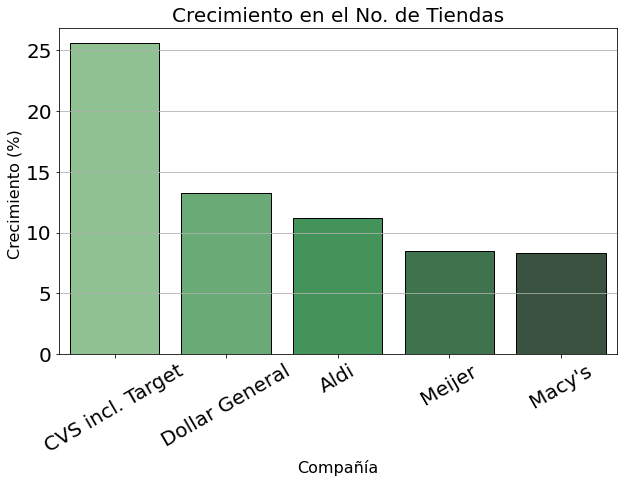

In [28]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_store_growth['Company'][:5], y=df_store_growth['% Store Count Growth'][:5], edgecolor='black', palette='Greens_d')
ax.yaxis.set_major_formatter(x_format)
plt.title('Crecimiento en el No. de Tiendas', fontsize=20)
plt.xlabel('Compañía', fontsize=16)
plt.ylabel('Crecimiento (%) ', fontsize=16)
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

The companies that invested the most in rising up their number of stores across the US were:

- CVS incl. Target.
- Dollar General.
- Aldi.
- Meijer.
- Macy's.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=82cabd29-c3ec-4eb7-a491-6de3fd04a701' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>